In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

import warnings
import copy
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('mimic3d.csv')
df.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1


In [ ]:
df_clean = copy.deepcopy(df)

#df_clean['marital_status_unknown'] = np.where((df['marital_status']=="UNKNOWN"), True, False)
#df_clean['AdmitDiagnosis'] = np.where((df['AdmitDiagnosis'].isna()), "NOT SPECIFIED", df_clean['AdmitDiagnosis'])

In [ ]:
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("HISPANIC/LATINO"), "HISPANIC OR LATINO", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("ASIAN -"), "ASIAN", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("WHITE - "), "WHITE", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("BLACK"), "BLACK", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("PORTUGUESE"), "WHITE", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("SOUTH AMERICAN"), "MULTI RACE ETHNICITY", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("CARIBBEAN ISLAND"), "MULTI RACE ETHNICITY", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("PACIFIC ISLANDER"), "PACIFIC ISLANDER", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("UNABLE TO OBTAIN"), "UNKNOWN/NOT SPECIFIED", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("PATIENT DECLINED TO ANSWER"), "UNKNOWN/NOT SPECIFIED", df_clean['ethnicity'])
df_clean['ethnicity'] = np.where(df_clean['ethnicity'].str.contains("AMERICAN INDIAN/ALASKA NATIVE"), "AMERICAN INDIAN/ALASKA NATIVE", df_clean['ethnicity'])

In [ ]:
df_clean['marital_status'] = np.where(df_clean['marital_status'].str.contains("UNKNOWN "), "UNKNOWN", df_clean['marital_status'])
df_clean['marital_status'] = np.where((df['marital_status'].isna()) & (df['age'] <= 18), "SINGLE", df_clean['marital_status'])
df_clean['marital_status'] = np.where((df['marital_status'].isna()) , "UNKNOWN", df_clean['marital_status'])

In [ ]:
df_clean['religion'] = np.where((df_clean['religion'].isna()), "UNKNOWN", df_clean['religion'])
df_clean['religion'] = np.where((df_clean['religion'] == "UNOBTAINABLE"), "UNKNOWN", df_clean['religion'])
df_clean['religion'] = np.where((df_clean['religion'] == "NOT SPECIFIED"), "UNKNOWN", df_clean['religion'])

In [ ]:
df_clean['age_g'] = np.where((df_clean['age'] <= 2), 0, df_clean['age'])
df_clean['age_g'] = np.where((df_clean['age'] <= 5)& (df_clean['age'] > 2), 1, df_clean['age_g'])
df_clean['age_g'] = np.where((df_clean['age'] <= 13)& (df_clean['age'] > 5), 2, df_clean['age_g'])
df_clean['age_g'] = np.where((df_clean['age'] <= 18)& (df_clean['age'] > 13), 3, df_clean['age_g'])
df_clean['age_g'] = np.where((df_clean['age'] <= 33)& (df_clean['age'] > 18), 4, df_clean['age_g'])
df_clean['age_g'] = np.where((df_clean['age'] <= 48)& (df_clean['age'] > 33), 5, df_clean['age_g'])
df_clean['age_g'] = np.where((df_clean['age'] <= 64)& (df_clean['age'] > 48), 6, df_clean['age_g'])
df_clean['age_g'] = np.where((df_clean['age'] <= 78)& (df_clean['age'] > 64), 7, df_clean['age_g'])
df_clean['age_g'] = np.where((df_clean['age'] >  78), 8, df_clean['age_g'])

df_clean.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum,age_g
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.05,5.19,14.91,1.13,0.65,398.70,0.0,493.89,1.0,5
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,UNKNOWN,SINGLE,...,1.59,5.45,7.18,0.99,1.24,373.02,0.0,465.71,1.0,6
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,UNKNOWN,SINGLE,...,0.15,4.15,6.23,0.00,0.33,286.21,0.0,344.00,3.0,5
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.17,9.05,11.52,0.00,0.96,526.06,0.0,603.05,1.0,7
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.34,16.19,25.00,2.87,2.05,554.92,0.0,679.84,1.0,6


________________________________________________________________________________________________________________________________________________________________

## diagnosis cleaning

In [ ]:
df = pd.read_excel('ICD10.xlsx')
df.head()

,CODE,SHORT DESCRIPTION (VALID ICD-10 FY2023),LONG DESCRIPTION (VALID ICD-10 FY2023),NF EXCL
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...","Cholera due to Vibrio cholerae 01, biovar chol...",NaN
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",NaN
2,A009,"Cholera, unspecified","Cholera, unspecified",NaN
3,A0100,"Typhoid fever, unspecified","Typhoid fever, unspecified",NaN
4,A0101,Typhoid meningitis,Typhoid meningitis,NaN


In [ ]:
df['Group'] = np.where(df['CODE'].str.startswith("A"), "Infections and parasitic diseases", df['CODE'])
df['Group'] = np.where(df['CODE'].str.startswith("B"), "Infections and parasitic diseases", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("C"), "Neoplasms", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("D"), "Neoplasms, Blood, Blood-forming Organs", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("E"), "Endocrine, Nutritional, Metabolic", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("F"), "Mental and Behavioral Disorders", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("G"), "Nervous System", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("H"), "Eye and Adnexa, Ear and Mastoid Process", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("I"), "Circulatory System", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("J"), "Respiratory System", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("K"), "Digestive System", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("L"), "Skin and Subcutaneous Tissue", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("M"), "Musculoskeletal and Connective Tissue", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("N"), "Genitourinary System", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("O"), "Pregnancy, Childbirth, and Puerperium", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("P"), "Certain Conditions Originating in the Perinatal Period", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("Q"), "Congenital Malformations, Deformations and Chromosomal Abnormalities", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("R"), "Symptoms, Signs and Abnormal Clinical and Lab Findings", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("S"), "Injury, Poisoning, Certain Other Consequences of External Causes", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("T"), "Injury, Poisoning, Certain Other Consequences of External Causes", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("U"), "U", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("V"), "External Causes of Morbidity", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("W"), "External Causes of Morbidity", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("X"), "External Causes of Morbidity", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("Y"), "External Causes of Morbidity", df['Group'])
df['Group'] = np.where(df['CODE'].str.startswith("Z"), "Factors influencing health status and contact with health services", df['Group'])

In [ ]:
df =df.drop([ 'SHORT DESCRIPTION (VALID ICD-10 FY2023)', 'NF EXCL'], axis=1)
df.head()

,CODE,LONG DESCRIPTION (VALID ICD-10 FY2023),Group
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Infections and parasitic diseases
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Infections and parasitic diseases
2,A009,"Cholera, unspecified",Infections and parasitic diseases
3,A0100,"Typhoid fever, unspecified",Infections and parasitic diseases
4,A0101,Typhoid meningitis,Infections and parasitic diseases


In [ ]:
rslt_df = df[df['Group'] == "U"]
rslt_df

,CODE,LONG DESCRIPTION (VALID ICD-10 FY2023),Group
65461,U070,Vaping-related disorder,U
65462,U071,COVID-19,U
65463,U099,"Post COVID-19 condition, unspecified",U


In [ ]:
import nltk
import re

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()
def doc_clean(text_content):
  if(type(text_content)== float):
    return "";
  text_content = word_tokenize(re.sub(r'[^a-zA-Z]', ' ', text_content.lower()))
  text_content = [ele for ele in text_content if ele not in stop_words]
  text_list = []
  for ele in text_content:
    ele = lemmatizer.lemmatize(ele, 'a')
    ele = lemmatizer.lemmatize(ele, 'v')
    ele = lemmatizer.lemmatize(ele, 'n')
    ele = lemmatizer.lemmatize(ele, 'r')
    ele = lemmatizer.lemmatize(ele, 's')
    text_list.append(ele)
  return(' '.join(text_list))

In [ ]:
df["tokens"] = df.apply (lambda x: doc_clean(x["LONG DESCRIPTION (VALID ICD-10 FY2023)"]), axis=1)
df

,CODE,LONG DESCRIPTION (VALID ICD-10 FY2023),Group,tokens
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",Infections and parasitic diseases,cholera due vibrio cholerae biovar cholerae
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Infections and parasitic diseases,cholera due vibrio cholerae biovar eltor
2,A009,"Cholera, unspecified",Infections and parasitic diseases,cholera unspecified
3,A0100,"Typhoid fever, unspecified",Infections and parasitic diseases,typhoid fever unspecified
4,A0101,Typhoid meningitis,Infections and parasitic diseases,typhoid meningitis
...,...,...,...,...
72831,Y990,Civilian activity done for income or pay,External Causes of Morbidity,civilian activity do income pay
72832,Y991,Military activity,External Causes of Morbidity,military activity
72833,Y992,Volunteer activity,External Causes of Morbidity,volunteer activity
72834,Y998,Other external cause status,External Causes of Morbidity,external cause status


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vects = vect.fit_transform(df["tokens"])

In [ ]:
term_document_matrix = pd.DataFrame(vects.todense())
term_document_matrix.columns = vect.get_feature_names_out()
term_document_matrix = term_document_matrix.T
term_document_matrix.columns = df["Group"]
term_document_matrix = term_document_matrix.T
term_document_matrix

,ab,abandonment,abdomen,abdominal,abducent,abductor,abl,ablation,ablative,abnormal,...,zero,zika,zinc,zone,zonular,zoonotic,zoster,zygomatic,zygomycoses,zygomycosis
Group,,,,,,,,,,,,,,,,,,,,,
Infections and parasitic diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Infections and parasitic diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Infections and parasitic diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Infections and parasitic diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Infections and parasitic diseases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
External Causes of Morbidity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
External Causes of Morbidity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
External Causes of Morbidity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#GA_prototype = term_document_matrix.sum()
G_prototypes = term_document_matrix.groupby('Group').sum()
G_prototypes

,ab,abandonment,abdomen,abdominal,abducent,abductor,abl,ablation,ablative,abnormal,...,zero,zika,zinc,zone,zonular,zoonotic,zoster,zygomatic,zygomycoses,zygomycosis
Group,,,,,,,,,,,,,,,,,,,,,
Certain Conditions Originating in the Perinatal Period,0,0,0,0,0,0,0,0,0,10,...,0,1,0,0,0,0,0,0,0,0
Circulatory System,0,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Congenital Malformations, Deformations and Chromosomal Abnormalities",0,0,0,3,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Digestive System,0,0,0,6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"Endocrine, Nutritional, Metabolic",0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
External Causes of Morbidity,0,0,0,0,0,0,0,0,0,19,...,0,0,0,0,0,0,0,0,0,0
"Eye and Adnexa, Ear and Mastoid Process",0,0,0,0,4,0,0,0,0,13,...,0,0,0,0,4,0,0,0,0,0
Genitourinary System,0,0,2,4,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
Infections and parasitic diseases,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,2,11,0,1,1


In [ ]:
G_prototypes = G_prototypes.T
G_prototypes

Group,Certain Conditions Originating in the Perinatal Period,Circulatory System,"Congenital Malformations, Deformations and Chromosomal Abnormalities",Digestive System,"Endocrine, Nutritional, Metabolic",External Causes of Morbidity,"Eye and Adnexa, Ear and Mastoid Process",Genitourinary System,Infections and parasitic diseases,"Injury, Poisoning, Certain Other Consequences of External Causes",Mental and Behavioral Disorders,Musculoskeletal and Connective Tissue,Neoplasms,"Neoplasms, Blood, Blood-forming Organs",Nervous System,"Pregnancy, Childbirth, and Puerperium",Respiratory System,Skin and Subcutaneous Tissue,"Symptoms, Signs and Abnormal Clinical and Lab Findings",U
ab,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
abandonment,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0
abdomen,0,0,0,0,0,0,0,2,0,54,0,10,3,2,0,0,0,0,2,0
abdominal,0,18,3,6,0,0,0,4,1,342,0,0,36,2,2,31,0,5,47,0
abducent,0,0,0,0,0,0,4,0,0,9,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoonotic,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
zoster,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0
zygomatic,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0
zygomycoses,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
row_sums = G_prototypes.sum(axis=1)
row_sums = np.log2(26 / row_sums).round(2)
df_multiplied = G_prototypes.mul(row_sums, axis=0)

In [ ]:
df_multiplied = df_multiplied.T
df_multiplied

,ab,abandonment,abdomen,abdominal,abducent,abductor,abl,ablation,ablative,abnormal,...,zero,zika,zinc,zone,zonular,zoonotic,zoster,zygomatic,zygomycoses,zygomycosis
Group,,,,,,,,,,,,,,,,,,,,,
Certain Conditions Originating in the Perinatal Period,0.0,0.00,-0.00,-0.00,0.0,-0.00,0.00,0.0,0.0,-30.50,...,0.00,3.7,0.00,-0.0,0.0,0.0,0.00,0.00,0.0,0.0
Circulatory System,0.0,0.00,-0.00,-76.68,0.0,-0.00,0.00,0.0,0.0,-0.00,...,0.00,0.0,0.00,-0.0,0.0,0.0,0.00,0.00,0.0,0.0
"Congenital Malformations, Deformations and Chromosomal Abnormalities",0.0,0.00,-0.00,-12.78,0.0,-0.00,0.00,0.0,0.0,-18.30,...,0.00,0.0,0.00,-0.0,0.0,0.0,0.00,0.00,0.0,0.0
Digestive System,0.0,0.00,-0.00,-25.56,0.0,-0.00,0.00,0.0,0.0,-3.05,...,0.00,0.0,0.00,-0.0,0.0,0.0,0.00,0.00,0.0,0.0
"Endocrine, Nutritional, Metabolic",0.0,0.00,-0.00,-0.00,0.0,-0.00,0.00,0.0,0.0,-0.00,...,0.00,0.0,1.78,-0.0,0.0,0.0,0.00,0.00,0.0,0.0
External Causes of Morbidity,0.0,0.00,-0.00,-0.00,0.0,-0.00,0.00,0.0,0.0,-57.95,...,0.00,0.0,0.00,-0.0,0.0,0.0,0.00,0.00,0.0,0.0
"Eye and Adnexa, Ear and Mastoid Process",0.0,0.00,-0.00,-0.00,4.0,-0.00,0.00,0.0,0.0,-39.65,...,0.00,0.0,0.00,-0.0,10.8,0.0,0.00,0.00,0.0,0.0
Genitourinary System,0.0,0.00,-2.98,-17.04,0.0,-0.00,0.00,4.7,4.7,-6.10,...,0.00,0.0,0.00,-0.0,0.0,0.0,0.00,0.00,0.0,0.0
Infections and parasitic diseases,0.0,0.00,-0.00,-4.26,0.0,-0.00,0.00,0.0,0.0,-0.00,...,0.00,3.7,0.00,-0.0,0.0,7.4,13.64,0.00,4.7,4.7


In [ ]:
df_multiplied.columns


Index(['ab', 'abandonment', 'abdomen', 'abdominal', 'abducent', 'abductor',
       'abl', 'ablation', 'ablative', 'abnormal',
       ...
       'zero', 'zika', 'zinc', 'zone', 'zonular', 'zoonotic', 'zoster',
       'zygomatic', 'zygomycoses', 'zygomycosis'],
      dtype='object', length=6137)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def doc_clean2(text_content):
  if(type(text_content)== float):
    return(0);
  text_content = word_tokenize(re.sub(r'[^a-zA-Z]', ' ', text_content.lower()))
  text_content = [ele for ele in text_content if ele not in stop_words]
  text_list = []
  for ele in text_content:
    ele = lemmatizer.lemmatize(ele, 'a')
    ele = lemmatizer.lemmatize(ele, 'v')
    ele = lemmatizer.lemmatize(ele, 'n')
    ele = lemmatizer.lemmatize(ele, 'r')
    ele = lemmatizer.lemmatize(ele, 's')
    text_list.append(ele)
  text_list = ''.join(text_list)
  q_vect = []
  max_termcount = 1
  for term in row_sums.index:
    term_count = text_list.count(term)
    if max_termcount < term_count:
      max_termcount = term_count
    q_vect.append(term_count*row_sums[term])
  q_vect = [i/max_termcount for i in q_vect]
  similarity_scores = cosine_similarity(df_multiplied, [q_vect]).round(5)
  most_similar_row_index = np.argmax(similarity_scores)
  return(df_multiplied.index[most_similar_row_index]);



In [ ]:
doc_clean2("Unspecified DEPRESSION")

'Genitourinary System'

In [ ]:
df_clean["AdmitDiagnosis"][0]

'DIABETIC KETOACIDOSIS'

In [ ]:
doc_clean2(df_clean["AdmitDiagnosis"][0])

'Endocrine, Nutritional, Metabolic'

In [ ]:
df_clean["AdmitDiagGroup"] = df_clean.apply (lambda x: doc_clean2(x["AdmitDiagnosis"]), axis=1)
df_clean

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum,age_g,AdmitDiagGroup
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,5.19,14.91,1.13,0.65,398.70,0,493.89,1,5,"Endocrine, Nutritional, Metabolic"
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,UNKNOWN,SINGLE,...,5.45,7.18,0.99,1.24,373.02,0,465.71,1,6,Nervous System
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,UNKNOWN,SINGLE,...,4.15,6.23,0.00,0.33,286.21,0,344.00,3,5,Certain Conditions Originating in the Perinata...
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,9.05,11.52,0.00,0.96,526.06,0,603.05,1,7,Digestive System
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,16.19,25.00,2.87,2.05,554.92,0,679.84,1,6,Circulatory System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,M,60,24.58,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,DIVORCED,...,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3,6,Circulatory System
58972,199994,F,58,9.75,EMERGENCY,EMERGENCY ROOM ADMIT,MENTAL STATUS CHANGES,Medicare,CATHOLIC,SINGLE,...,7.90,0.00,0.00,0.31,674.05,0,834.98,2,6,Nervous System
58973,199995,M,23,16.75,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,Private,PROTESTANT QUAKER,SINGLE,...,6.27,5.79,0.00,0.36,207.10,0,261.30,3,4,Digestive System
58974,199998,M,69,5.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,...,12.24,17.69,0.00,1.02,426.87,0,537.42,1,7,Circulatory System


In [ ]:
from google.colab import files
df_clean.to_csv('mimic3d_v3.csv', encoding = 'utf-8-sig')
files.download('mimic3d_v3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# patients

In [ ]:
df = pd.read_csv('mimic3d_v3.csv')
df.head()

,Unnamed: 0,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,...,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum,age_g,AdmitDiagGroup
0,0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,...,5.19,14.91,1.13,0.65,398.70,0,493.89,1,5,"Endocrine, Nutritional, Metabolic"
1,1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,UNKNOWN,...,5.45,7.18,0.99,1.24,373.02,0,465.71,1,6,Nervous System
2,2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,UNKNOWN,...,4.15,6.23,0.00,0.33,286.21,0,344.00,3,5,Certain Conditions Originating in the Perinata...
3,3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,...,9.05,11.52,0.00,0.96,526.06,0,603.05,1,7,Digestive System
4,4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,...,16.19,25.00,2.87,2.05,554.92,0,679.84,1,6,Circulatory System


In [ ]:
df.columns
#df['admit_type'].unique()

Index(['Unnamed: 0', 'hadm_id', 'gender', 'age', 'LOSdays', 'admit_type',
       'admit_location', 'AdmitDiagnosis', 'insurance', 'religion',
       'marital_status', 'ethnicity', 'NumCallouts', 'NumDiagnosis',
       'NumProcs', 'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs',
       'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents',
       'NumTransfers', 'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract',
       'LOSgroupNum', 'age_g', 'AdmitDiagGroup'],
      dtype='object')

In [ ]:
pf = pd.read_csv('Patient.csv')
#pf.head()

In [ ]:
pf['age_g'] = np.where((pf['Age'] <= 2), 0, pf['Age'])
pf['age_g'] = np.where((pf['Age'] <= 5)& (pf['Age'] > 2), 1, pf['age_g'])
pf['age_g'] = np.where((pf['Age'] <= 13)& (pf['Age'] > 5), 2, pf['age_g'])
pf['age_g'] = np.where((pf['Age'] <= 18)& (pf['Age'] > 13), 3, pf['age_g'])
pf['age_g'] = np.where((pf['Age'] <= 33)& (pf['Age'] > 18), 4, pf['age_g'])
pf['age_g'] = np.where((pf['Age'] <= 48)& (pf['Age'] > 33), 5, pf['age_g'])
pf['age_g'] = np.where((pf['Age'] <= 64)& (pf['Age'] > 48), 6, pf['age_g'])
pf['age_g'] = np.where((pf['Age'] <= 78)& (pf['Age'] > 64), 7, pf['age_g'])
pf['age_g'] = np.where((pf['Age'] >  78), 8, pf['age_g'])

pf['Gender'] = np.where((pf['Gender'] == "Male"), 0, 1)
pf['Previous admission'] = np.where((pf['Previous admission'] == "No"), 0, 1)
pf['Inpatient/outpatient']	= np.where((pf['Inpatient/outpatient'] == "Inpatient"), 1, 0)
pf['Close_dist'] = np.where((pf['Location/distance'] <= 5), 1, 0)

pf['Income'] = np.where((pf['Income'] == "Low"), 1/3, pf['Income'])
pf['Income'] = np.where((pf['Income'] == "Medium"), 2/3, pf['Income'])
pf['Income'] = np.where((pf['Income'] == "High"), 3/3, pf['Income'])

pf['LOSgroupNum'] = np.where((pf['Length of Stay'] <= 4), 0, pf['Length of Stay'])
pf['LOSgroupNum'] = np.where((pf['Length of Stay'] <= 8) & (pf['Length of Stay'] > 4), 1, pf['LOSgroupNum'])
pf['LOSgroupNum'] = np.where((pf['Length of Stay'] <= 12) & (pf['Length of Stay'] > 8), 2, pf['LOSgroupNum'])
pf['LOSgroupNum'] = np.where((pf['Length of Stay'] > 12), 8, pf['LOSgroupNum'])

In [ ]:
pf["AdmitDiagGroup"] = pf.apply (lambda x: doc_clean2(x["Diagnosis"]), axis=1)

In [ ]:
pf['Height_bins'] = pd.qcut(pf['Height'], q=10, precision=0)
pf['Height_bin_val'] = pf.groupby("Height_bins")['Height'].transform("mean")

In [ ]:
pf.columns
pf

,Horodateur,Age,Height,Weight,Gender,Diagnosis,Marital Status,Income,Length of Stay,Location/distance,...,Severity of injuries,Condition at discharge,Admission Type,Blood types,age_g,Close_dist,LOSgroupNum,AdmitDiagGroup,Height_bins,Height_bin_val
0,2023/06/05 10:47:32 PM UTC−4,10,149.86,32,1,Asthma,Single,0.333333,0.08,5.0,...,Non-life Threatening,Stable,Elective,A,2,1,0.0,Respiratory System,"(1.0, 150.0]",111.354286
1,2023/06/05 10:53:15 PM UTC−4,21,172.00,55,1,Depression,Single,0.333333,2.40,3.0,...,Life-threatening,Stable,Elective,O,4,1,0.0,"Pregnancy, Childbirth, and Puerperium","(170.0, 173.0]",172.333333
2,2023/06/05 11:03:37 PM UTC−4,13,145.00,43,0,Hypertension,Single,0.333333,24.00,12.0,...,Superficial,Stable,Elective,RH-positive,2,0,8.0,Circulatory System,"(1.0, 150.0]",111.354286
3,2023/06/05 11:09:01 PM UTC−4,55,170.00,150,0,Asthma,Married,0.666667,0.20,5.0,...,Non-life Threatening,Stable,Emergency,O,6,1,0.0,Respiratory System,"(165.0, 170.0]",169.625000
4,2023/06/05 11:13:51 PM UTC−4,22,183.00,180,0,Dementia,Single,0.333333,0.20,8.0,...,Severe,Improved,Elective,B,4,0,0.0,Mental and Behavioral Disorders,"(180.0, 185.0]",183.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023/06/06 12:19:04 PM UTC−4,23,175.00,68,1,Appendicitis,Single,0.666667,0.30,5.0,...,Superficial,Stable,Urgent,B,4,1,0.0,"Injury, Poisoning, Certain Other Consequences ...","(173.0, 177.0]",175.750000
57,2023/06/06 12:19:07 PM UTC−4,65,180.00,76,0,Hypertension,Married,0.666667,0.25,12.0,...,Severe,Stable,Emergency,O,7,0,0.0,Circulatory System,"(179.0, 180.0]",180.000000
58,2023/06/06 12:44:37 PM UTC−4,70,165.00,58,1,Cancer,Divorced,0.666667,10.00,37.0,...,Severe,Unchanged,Urgent,AB,7,0,2.0,"Symptoms, Signs and Abnormal Clinical and Lab ...","(160.0, 165.0]",163.666667
59,2023/06/06 12:47:47 PM UTC−4,50,180.00,90,0,Gastrointestinal Bleeding,Married,0.666667,5.00,4.0,...,Life-threatening,Stable,Emergency,B,6,1,1.0,Digestive System,"(179.0, 180.0]",180.000000


In [ ]:
from google.colab import files
pf.to_csv('patients_clean.csv', encoding = 'utf-8-sig')
files.download('patients_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## temp

<Axes: >

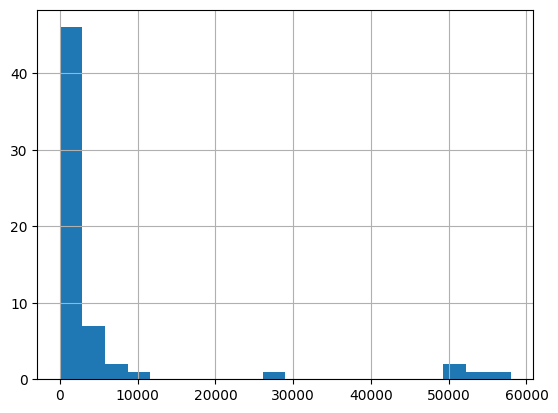

In [ ]:
pf['Cost of stay'].hist(bins=20)

In [ ]:
pf['Diagnosis'].unique()

array(['Asthma', 'Depression', 'Hypertension', 'Dementia', 'Appendicitis',
       'Fractured Hip', 'Stroke', 'Diabetes Mellitus', 'Anxiety Disorder',
       'Cancer', 'Osteoarthritis', 'Pneumonia', 'Schizophrenia',
       'Gastrointestinal Bleeding'], dtype=object)

In [ ]:
doc_clean2("Osteoarthritis")

'Musculoskeletal and Connective Tissue'

In [ ]:
pf.loc[(pf['Location/distance'] <= 5)].count()

# Bayesian Linear Regression

In [ ]:
pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ________________________________________________________________________________________________________________________________________________________________

In [ ]:
pip install dython

In [ ]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

categorical_features=identify_nominal_columns(df_clean)
complete_correlation= associations(df_clean, filename= 'complete_correlation.png', figsize=(30,30))['corr']